## Lab Session

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


### Load the dataset

In [3]:
tips = sns.load_dataset('tips')
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
categorical_columns = tips.select_dtypes(include=['object']).columns.tolist()
numerical_columns = tips.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns, numerical_columns


([], ['total_bill', 'tip', 'size'])

### 2. Compute the average bill amount for each day.

In [5]:
avg_bill_per_day = tips.groupby('day')['total_bill'].mean()
avg_bill_per_day


<ipython-input-5-3e364e19c77f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bill_per_day = tips.groupby('day')['total_bill'].mean()


,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


### 3. Which gender is more generous in giving tips?

In [6]:
generous_gender = tips.groupby('sex')['tip'].mean().idxmax()
generous_gender


<ipython-input-6-c1f3623d1e28>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generous_gender = tips.groupby('sex')['tip'].mean().idxmax()


'Male'

### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
meal_time_count = tips['time'].value_counts()
meal_time_count


,count
time,
Dinner,176
Lunch,68


### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
tips['tip'].describe()


,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


### 6. Find the busiest day in terms of the orders?

In [9]:
busiest_day = tips['day'].value_counts().idxmax()
busiest_day


'Sat'

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

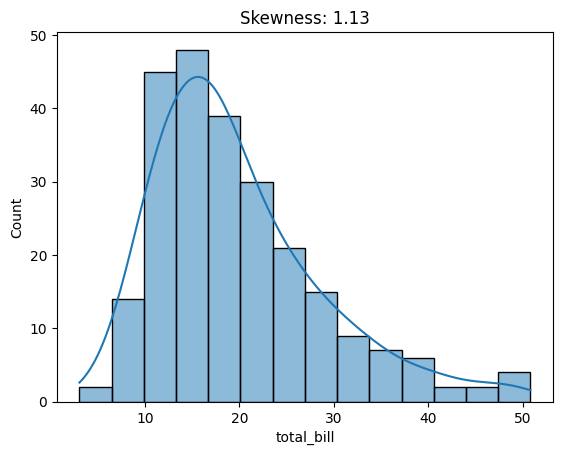

In [10]:
skewness = tips['total_bill'].skew()
sns.histplot(tips['total_bill'], kde=True)
plt.title(f'Skewness: {skewness:.2f}')
plt.show()


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

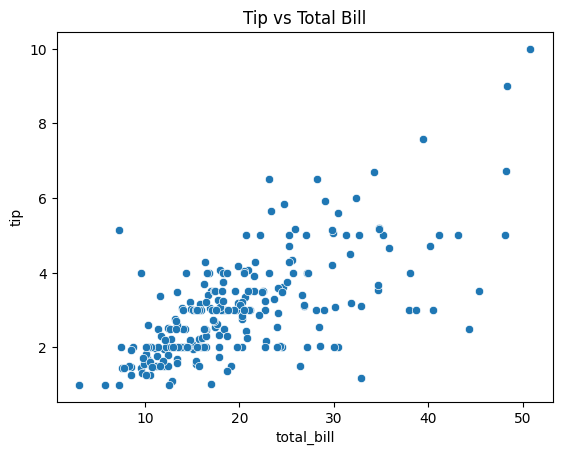

In [11]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Tip vs Total Bill")
plt.show()


### 9. What is the percentage of males and females in the dataset? and display it in the plot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

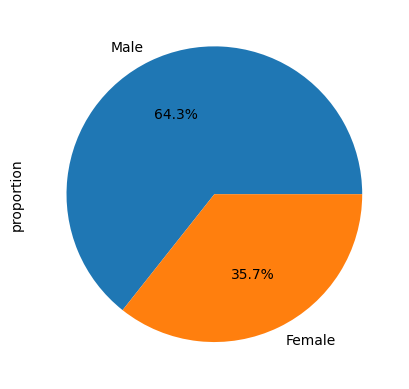

In [12]:
gender_percentage = tips['sex'].value_counts(normalize=True) * 100
gender_percentage.plot(kind='pie', autopct='%1.1f%%')
plt


### 10. Compute the gender-wise count based on smoking habits and display it in the plot

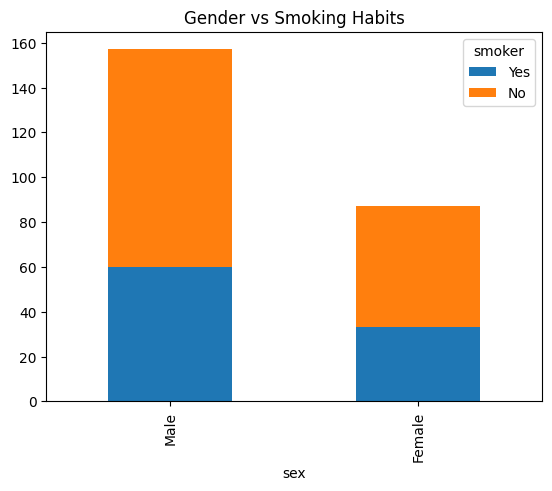

In [13]:

smoking_gender = pd.crosstab(tips['sex'], tips['smoker'])
smoking_gender.plot(kind='bar', stacked=True)
plt.title("Gender vs Smoking Habits")
plt.show()


### 11. Compute the average tip amount given for different days and display it in the plot.

<ipython-input-14-ab5b05023f16>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per_day = tips.groupby('day')['tip'].mean()


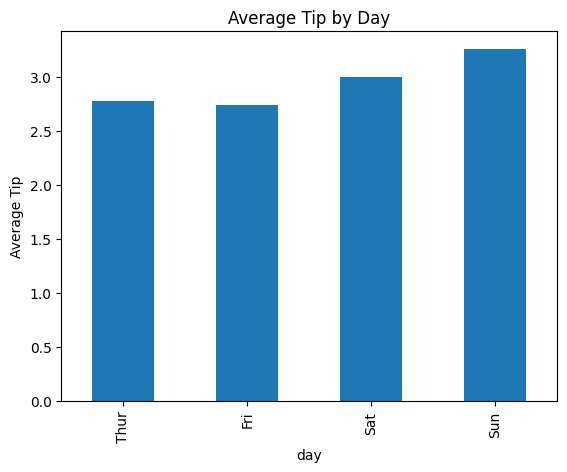

In [14]:
# Average tip by day and plot
avg_tip_per_day = tips.groupby('day')['tip'].mean()
avg_tip_per_day.plot(kind='bar')
plt.title("Average Tip by Day")
plt.ylabel("Average Tip")
plt.show()


### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Average Bill by Group Size:
size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


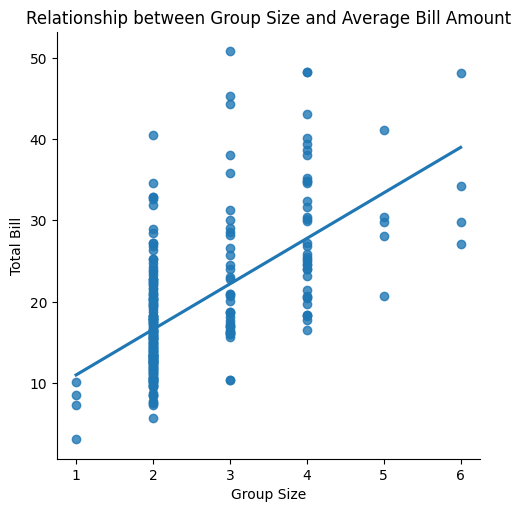

In [15]:
# Task 12: Is the average bill amount dependent on the size of the group?
avg_bill_by_size = tips.groupby('size')['total_bill'].mean()  # Calculate average total bill for each group size
print("Average Bill by Group Size:")
print(avg_bill_by_size)

# Scatter plot with regression line to visualize the relationship
sns.lmplot(x='size', y='total_bill', data=tips, ci=None)
plt.title("Relationship between Group Size and Average Bill Amount")
plt.xlabel("Group Size")
plt.ylabel("Total Bill")
plt.show()


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

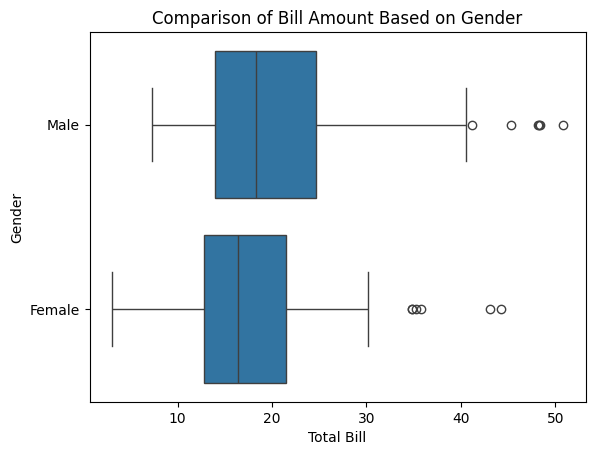

In [16]:
# Task 13: Plot a horizontal boxplot to compare the bill amount based on gender
sns.boxplot(x='total_bill', y='sex', data=tips, orient='h')
plt.title("Comparison of Bill Amount Based on Gender")
plt.xlabel("Total Bill")
plt.ylabel("Gender")
plt.show()


14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [17]:
weekend_data = tips[(tips['day'].isin(['Sat', 'Sun'])) & (tips['time'].isin(['Lunch', 'Dinner']))]

# Group by day and time, then find the maximum total bill
max_bill_weekend = weekend_data.groupby(['day', 'time'])['total_bill'].max()
print("Maximum bill amount for lunch and dinner on Saturday and Sunday:")
print(max_bill_weekend)

Maximum bill amount for lunch and dinner on Saturday and Sunday:
day   time  
Thur  Lunch       NaN
      Dinner      NaN
Fri   Lunch       NaN
      Dinner      NaN
Sat   Lunch       NaN
      Dinner    50.81
Sun   Lunch       NaN
      Dinner    48.17
Name: total_bill, dtype: float64


<ipython-input-17-747aab6dbabd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_bill_weekend = weekend_data.groupby(['day', 'time'])['total_bill'].max()


### 15. Compute the percentage of missing values in the dataset.

In [18]:

missing_percentage = tips.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [19]:
duplicate_count = tips.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

# Drop duplicates if any exist
if duplicate_count > 0:
    tips = tips.drop_duplicates()
    print("Duplicate records have been dropped.")
else:
    print("No duplicate records found.")

Number of duplicate records: 1
Duplicate records have been dropped.


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

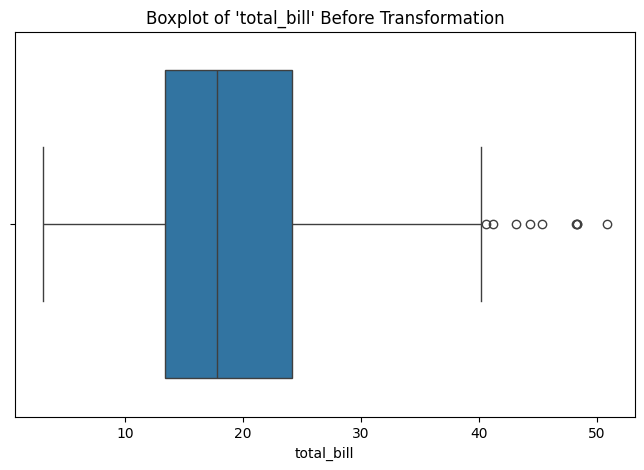

Skewness of 'total_bill' before transformation: 1.1273625781584489


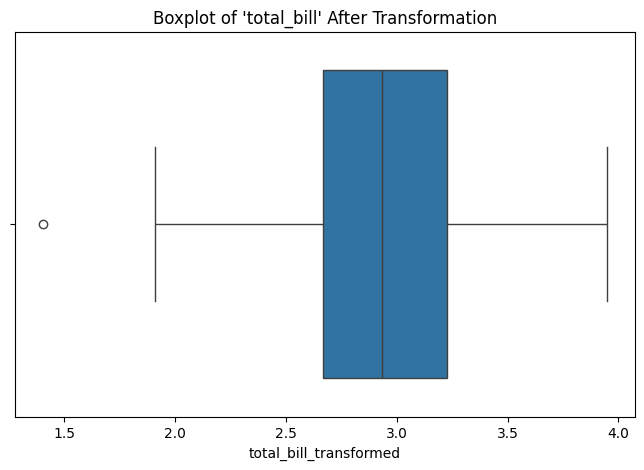

Skewness of 'total_bill' after transformation: -0.018400211976009148


In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_bill', data=tips)
plt.title("Boxplot of 'total_bill' Before Transformation")
plt.show()

# Check skewness to understand if transformation could help with outliers
skewness = tips['total_bill'].skew()
print(f"Skewness of 'total_bill' before transformation: {skewness}")

# Apply a log transformation to 'total_bill' to reduce outliers' effect
tips['total_bill_transformed'] = np.log1p(tips['total_bill'])  # log1p is log(1 + x), handles zero values

# Boxplot after transformation to observe changes
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_bill_transformed', data=tips)
plt.title("Boxplot of 'total_bill' After Transformation")
plt.show()

# Check skewness after transformation
skewness_transformed = tips['total_bill_transformed'].skew()
print(f"Skewness of 'total_bill' after transformation: {skewness_transformed}")

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [21]:
Q1 = tips['tip'].quantile(0.25)
Q3 = tips['tip'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Filter the dataset to remove outliers
tips_no_outliers = tips[(tips['tip'] >= lower_bound) & (tips['tip'] <= upper_bound)]

# Display the number of records before and after removing outliers
print(f"Original dataset size: {tips.shape[0]}")
print(f"Dataset size after removing outliers: {tips_no_outliers.shape[0]}")

Lower bound for outliers: -0.36250000000000027
Upper bound for outliers: 5.9375
Original dataset size: 243
Dataset size after removing outliers: 235


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [22]:
tips_encoded = pd.get_dummies(tips, drop_first=True)  # drop_first=True avoids the dummy variable trap

# Display 5 random samples from the encoded dataframe
print("5 Random Samples from the Encoded DataFrame:")
print(tips_encoded.sample(5))

5 Random Samples from the Encoded DataFrame:
     total_bill  tip  size  total_bill_transformed  sex_Female  smoker_No  \
227       20.45  3.0     4                3.065725       False       True   
217       11.59  1.5     2                2.532903       False      False   
133       12.26  2.0     2                2.584752        True       True   
47        32.40  6.0     4                3.508556       False       True   
231       15.69  3.0     3                2.814810       False      False   

     day_Fri  day_Sat  day_Sun  time_Dinner  
227    False     True    False         True  
217    False     True    False         True  
133    False    False    False        False  
47     False    False     True         True  
231    False     True    False         True  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [23]:

# Check the original range of 'total_bill'
min_bill = tips['total_bill'].min()
max_bill = tips['total_bill'].max()
print(f"Original range of 'total_bill': Min = {min_bill}, Max = {max_bill}")

# Apply Min-Max scaling to transform 'total_bill' to range between 0 and 1
tips['total_bill_scaled'] = (tips['total_bill'] - min_bill) / (max_bill - min_bill)

# Check the new range of the scaled 'total_bill' column
print(f"New range of 'total_bill_scaled': Min = {tips['total_bill_scaled'].min()}, Max = {tips['total_bill_scaled'].max()}")


Original range of 'total_bill': Min = 3.07, Max = 50.81
New range of 'total_bill_scaled': Min = 0.0, Max = 1.0


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [24]:
import seaborn as sns

# Load the tips dataset and assign it to tips_df
tips_df = sns.load_dataset('tips')

# Display the first few rows of the new dataframe to confirm
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into 70% train and 30% test
X = tips_df.drop(columns=['tip'])  # Features (drop the target column 'tip')
y = tips_df['tip']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MinMaxScaler for scaling between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler on 'total_bill' and 'size' columns of the training set and transform both train and test sets
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Display the first few rows of the scaled training data to verify
print("Scaled Training Data (first 5 rows):")
print(X_train.head())

Scaled Training Data (first 5 rows):
     total_bill   sex smoker  day    time  size
234    0.217044  Male    Yes  Sat  Dinner   0.2
227    0.326232  Male     No  Sat  Dinner   0.6
180    0.641367  Male    Yes  Sun  Dinner   0.6
5      0.433644  Male     No  Sun  Dinner   0.6
56     0.715934  Male    Yes  Sat  Dinner   0.6


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns
tips_df = sns.load_dataset('tips')

tips_encoded = pd.get_dummies(tips_df, drop_first=True)  # Automatically encodes all categorical columns

# Separate features and target variable
X = tips_encoded.drop(columns=['tip'])  # Features
y = tips_encoded['tip']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Min-Max scaling to 'total_bill' and 'size' columns
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value for the model's performance on the test data
r_squared = r2_score(y_test, y_pred)
print("R-squared value of the prediction on the test data:", r_squared)


R-squared value of the prediction on the test data: 0.29309667441267273


### Happy Learning:)